In [1]:
import pandas as pd

df = pd.read_csv('bot_detection_data.csv')

In [2]:
df.head()

User ID        Username                                              Tweet  \
0   132131           flong  Station activity person against natural majori...   
1   289683  hinesstephanie  Authority research natural life material staff...   
2   779715      roberttran  Manage whose quickly especially foot none to g...   
3   696168          pmason  Just cover eight opportunity strong policy which.   
4   704441          noah87                      Animal sign six data good or.   

   Retweet Count  Mention Count  Follower Count  Verified  Bot Label  \
0             85              1            2353     False          1   
1             55              5            9617      True          0   
2              6              2            4363      True          0   
3             54              5            2242      True          1   
4             26              3            8438     False          1   

       Location           Created At            Hashtags  
0     Adkinston  2020-05-11 15:29:50                 NaN  
1    Sanderston  2022-11-26 05:18:10           both live  
2  Harrisonfurt  2022-08-08 03:16:54         phone ahead  
3  Martinezberg  2021-08-14 22:27:05  ever quickly new I  
4  Camachoville  2020-04-13 21:24:21     foreign mention

In [3]:
df.shape

(50000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [5]:
df.describe()

User ID  Retweet Count  Mention Count  Follower Count  \
count   50000.000000    50000.00000   50000.000000    50000.000000   
mean   548890.680540       50.00560       2.513760     4988.602380   
std    259756.681425       29.18116       1.708563     2878.742898   
min    100025.000000        0.00000       0.000000        0.000000   
25%    323524.250000       25.00000       1.000000     2487.750000   
50%    548147.000000       50.00000       3.000000     4991.500000   
75%    772983.000000       75.00000       4.000000     7471.000000   
max    999995.000000      100.00000       5.000000    10000.000000   

          Bot Label  
count  50000.000000  
mean       0.500360  
std        0.500005  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

# Data description
There is total of 11 columns and 50 000 rows of data. Each row represents 1 tweet along with its info. The data takes up about 3.9+ MB of memory.
### Columns and description:
Info was gotten from the Readme.md file from the dataset origin
- User ID: Unique identifier for each user in the dataset.
- Username: The username associated with the user.
- Tweet: The text content of the tweet.
- Retweet Count: The number of times the tweet has been retweeted.
- Mention Count: The number of mentions in the tweet.
- Follower Count: The number of followers the user has.
- Verified: A boolean value indicating whether the user is verified or not.
- Bot Label: A label indicating whether the user is a bot (1) or not (0).
- Location: The location associated with the user.
- Created At: The date and time when the tweet was created.
- Hashtags: The hashtags associated with the tweet.

There are some Nan values in the Hastags columns, but these are not errors in our case, these describe a tweet, where the user did not select/write any hashtags. Thus these Nan values are not removed.

- From the data describe function, we can see that the median tweet got 50 retweets. The std is 29 for retweet count (pärast täpsuustada!!). The minimum number of retweet count is 0 and the maximum is 100.
- The median tweet got 2.5 mentions. The std is 1.7 for mention count. The minimum number of mention count is 0 and the maximum is 5.
- The median tweet user has got 4988.6 followers. The std is 2878.7 for follower count. The minimum number of follower count is 0 and the maximum is 10000.

In [6]:
df['Bot Label'].value_counts()

Bot Label
1    25018
0    24982
Name: count, dtype: int64

There is total of 25018 tweets by bots and 24982 tweets by not bots, aka real human tweets. It can be summarised as 50% tweets by bots and 50% tweets by humans.

In [7]:
df['User ID'].unique().size

50000

In [8]:
df['Username'].unique().size

40566

As the number of unique user IDs is the same as the total number of tweets in our dataset, this means that we have only 1 tweet from each user. This leaves out a possability of using the number of tweets per user. As the number of unique usernames is smaller than the total number of tweets, it might seem as we have many tweets per user, but this turned out to be not true based on the info gotten from the number of unique user IDs.

In [9]:
df['Verified'].value_counts()

Verified
True     25004
False    24996
Name: count, dtype: int64

We have a total of 25004 tweets from verified accounts and 24996 tweets from not verified accounts. To summarize, half of the tweets came from a verified account, the other half came from a not verified account.

Lets post a hypothesis, most of the tweets that came from a not verified account, are from bots.

In [10]:
df[(df['Verified'] == False) & (df['Bot Label'] == 1)].shape

(12540, 11)

Turns out, 12540 tweets did fit our hypothesis, this is half of the 25018 bots we wanted to catch, this alone will not be enough, but might help us later.

Lets have a look at where are the tweets coming from.

In [11]:
df['Location'].value_counts()

Location
South Michael        44
Lake Michael         40
North Jennifer       38
North Michael        38
Lake David           37
                     ..
Lake Sarahchester     1
Port Tiffanyberg      1
New Jasonbury         1
Payneshire            1
Deborahfort           1
Name: count, Length: 25199, dtype: int64

In [12]:
location_counts = df['Location'].value_counts()
location_counts.shape

(25199,)

Lets see how many of the most popular location tweets are from bots?

In [13]:
df[(df['Location'] == 'South Michael') & (df['Bot Label'] == 1)].shape

(21, 11)

Less than half this time. Lets look how many of the tweets came from places where the location count is 1.

In [14]:
filtered_df = df[df['Location'].isin(location_counts[location_counts == 1].index)]
filtered_df.shape

(16295, 11)

In [15]:
filtered_df[(filtered_df['Bot Label'] == 1)].shape

(8167, 11)

There is a total of 16295 tweets that have a location with the count of 1. Around half of these are from bots. It looks like the bots tweets are evenly distributed with locations.

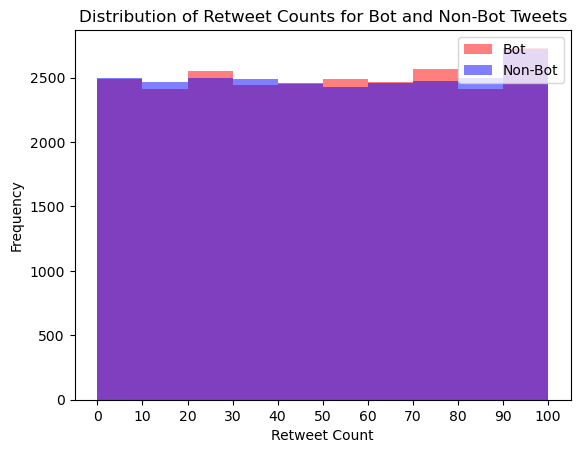

In [16]:
import matplotlib.pyplot as plt
import numpy as np

bin_edges = np.arange(0, 101, 10)
bot_tweets = df[df['Bot Label'] == 1]['Retweet Count']
plt.hist(bot_tweets, bins=bin_edges, alpha=0.5, label='Bot', color='red')

non_bot_tweets = df[df['Bot Label'] == 0]['Retweet Count']
plt.hist(non_bot_tweets, bins=bin_edges, alpha=0.5, label='Non-Bot', color='blue')

plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Distribution of Retweet Counts for Bot and Non-Bot Tweets')
plt.xticks(bin_edges)  
plt.legend()
plt.show()

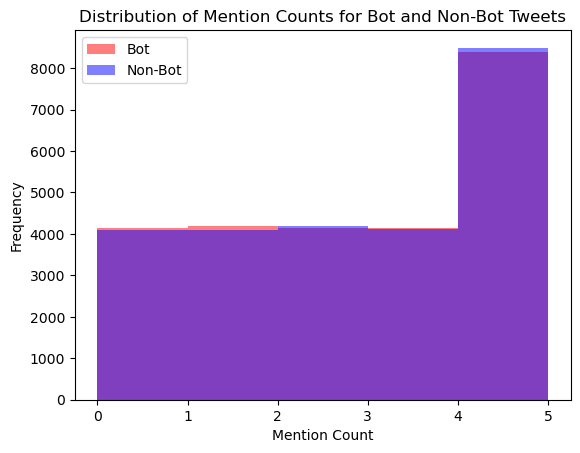

In [17]:
bins = range(0, 6) 

bot_tweets = df[df['Bot Label'] == 1]['Mention Count']
plt.hist(bot_tweets, bins=bins, alpha=0.5, label='Bot', color='red')

non_bot_tweets = df[df['Bot Label'] == 0]['Mention Count']
plt.hist(non_bot_tweets, bins=bins, alpha=0.5, label='Non-Bot', color='blue')

plt.xlabel('Mention Count')
plt.ylabel('Frequency')
plt.title('Distribution of Mention Counts for Bot and Non-Bot Tweets')
plt.xticks(bins) 
plt.legend()
plt.show()

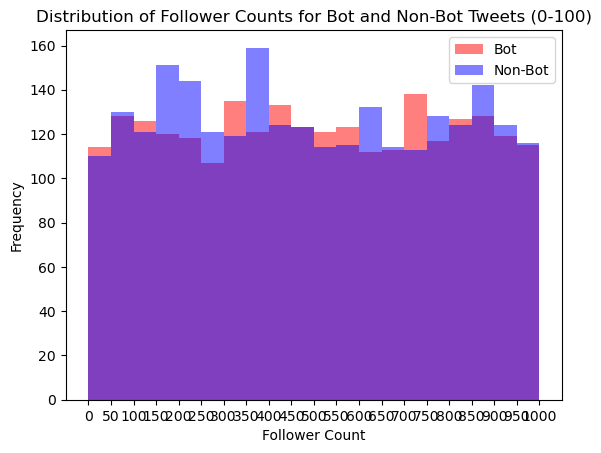

In [18]:
bin_edges = np.arange(0, 1001, 50)

bot_tweets = df[df['Bot Label'] == 1]['Follower Count']
plt.hist(bot_tweets, bins=bin_edges, alpha=0.5, label='Bot', color='red')

non_bot_tweets = df[df['Bot Label'] == 0]['Follower Count']
plt.hist(non_bot_tweets, bins=bin_edges, alpha=0.5, label='Non-Bot', color='blue')

plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Counts for Bot and Non-Bot Tweets (0-100)')
plt.xticks(bin_edges)  
plt.legend()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

df2 = df.copy()
df2['verified'] = df['Verified'].astype(int)
df2['tweet_length'] = df['Tweet'].astype(str).apply(len)
df2['hashtag_count'] = df['Hashtags'].astype(str).apply(lambda x: len(x.split(',')) if x != 'nan' else 0)
df2['created_at'] = pd.to_datetime(df['Created At'])
df2['tweet_hour'] = df2['created_at'].dt.hour
df2['tweet_weekday'] = df2['created_at'].dt.weekday

vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df2['Tweet'].astype(str))

X = pd.concat([
    df2[['Follower Count', 'verified', 'Retweet Count', 'Mention Count', 'tweet_length', 'hashtag_count', 'tweet_hour', 'tweet_weekday']].reset_index(drop=True),
    pd.DataFrame(tfidf_matrix.toarray())
], axis=1)

X.columns = X.columns.astype(str)  
y = df2['Bot Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.52      0.50      4968
           1       0.49      0.46      0.47      5032

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53      4968
           1       0.51      0.44      0.47      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



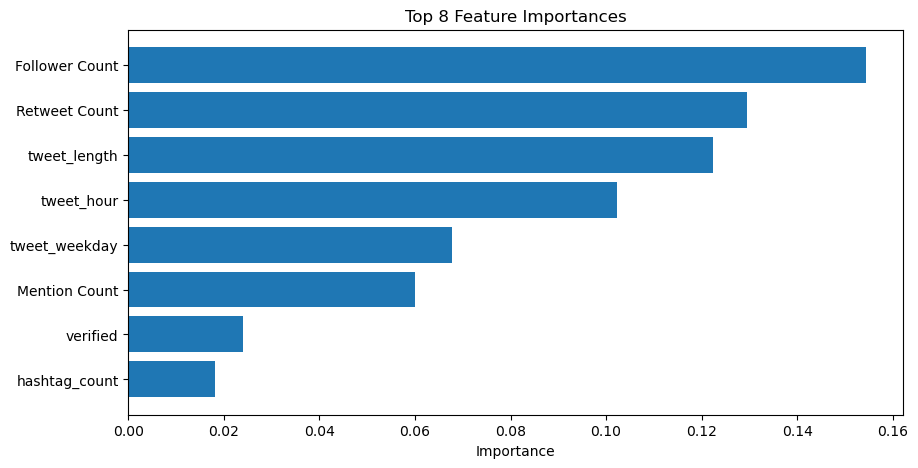

In [21]:
importances = clf.feature_importances_
indices = np.argsort(importances)[-8:] 

plt.figure(figsize=(10, 5))
plt.title("Top 8 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53      4968
           1       0.51      0.44      0.47      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.54      0.52      4968
           1       0.50      0.45      0.47      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [ ]:
#new try

In [26]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 1.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import faiss
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Step 0: Extract tweets from the DataFrame
tweet_texts = df["Tweet"].astype(str).tolist()  # make sure all entries are strings

# ✅ Step 1: Convert tweets to TF-IDF embeddings
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(tweet_texts).toarray().astype('float32')

# ✅ Step 2: Use FAISS to find top k similar nodes
index = faiss.IndexFlatL2(X.shape[1])
index.add(X)
k = 10  # number of neighbors
distances, indices = index.search(X, k + 1)  # k+1 to skip self

# ✅ Step 3: Build edges
edges = []
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # skip the first (self)
        edges.append((i, j))

# Optional: Convert to DataFrame for easier use later
import pandas as pd
edges_df = pd.DataFrame(edges, columns=["source", "target"])

In [4]:
for source, target in edges[:5]:
    print(f"Tweet {source}: {tweet_texts[source]}")
    print(f"  ↳ Similar to Tweet {target}: {tweet_texts[target]}")
    print("---")

Tweet 0: Station activity person against natural majority none few size expect six marriage.
  ↳ Similar to Tweet 34122: Marriage to few answer beyond size medical.
---
Tweet 0: Station activity person against natural majority none few size expect six marriage.
  ↳ Similar to Tweet 12759: Person person few leave last return office.
---
Tweet 0: Station activity person against natural majority none few size expect six marriage.
  ↳ Similar to Tweet 19659: Size world house station current address marriage work four approach arm.
---
Tweet 0: Station activity person against natural majority none few size expect six marriage.
  ↳ Similar to Tweet 6941: Certain have example reach require station art every at majority model expect.
---
Tweet 0: Station activity person against natural majority none few size expect six marriage.
  ↳ Similar to Tweet 27981: Station also free heavy station officer green level natural cause.
---


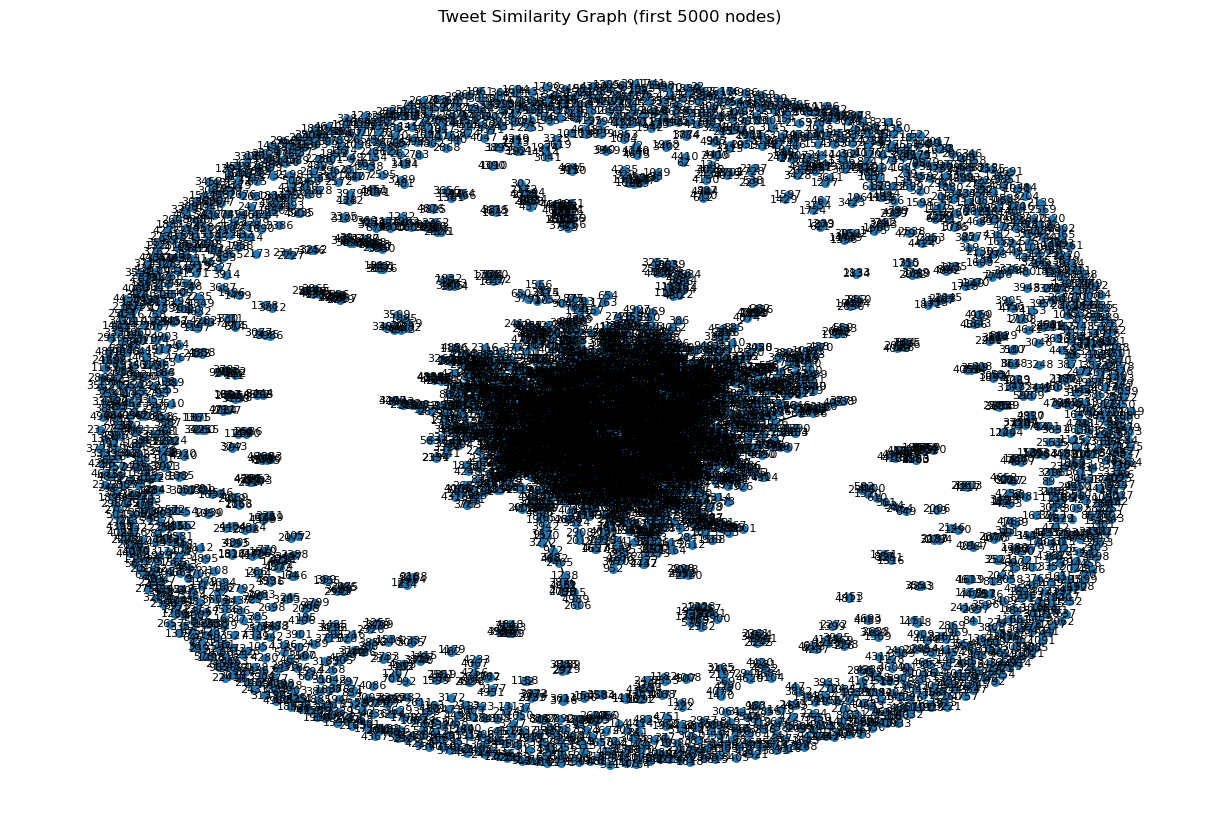

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(edges)

# Optional: limit to a subgraph for readability
subgraph_nodes = list(range(5000))  # first 100 tweets
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=30, font_size=8)
plt.title("Tweet Similarity Graph (first 5000 nodes)")
plt.show()

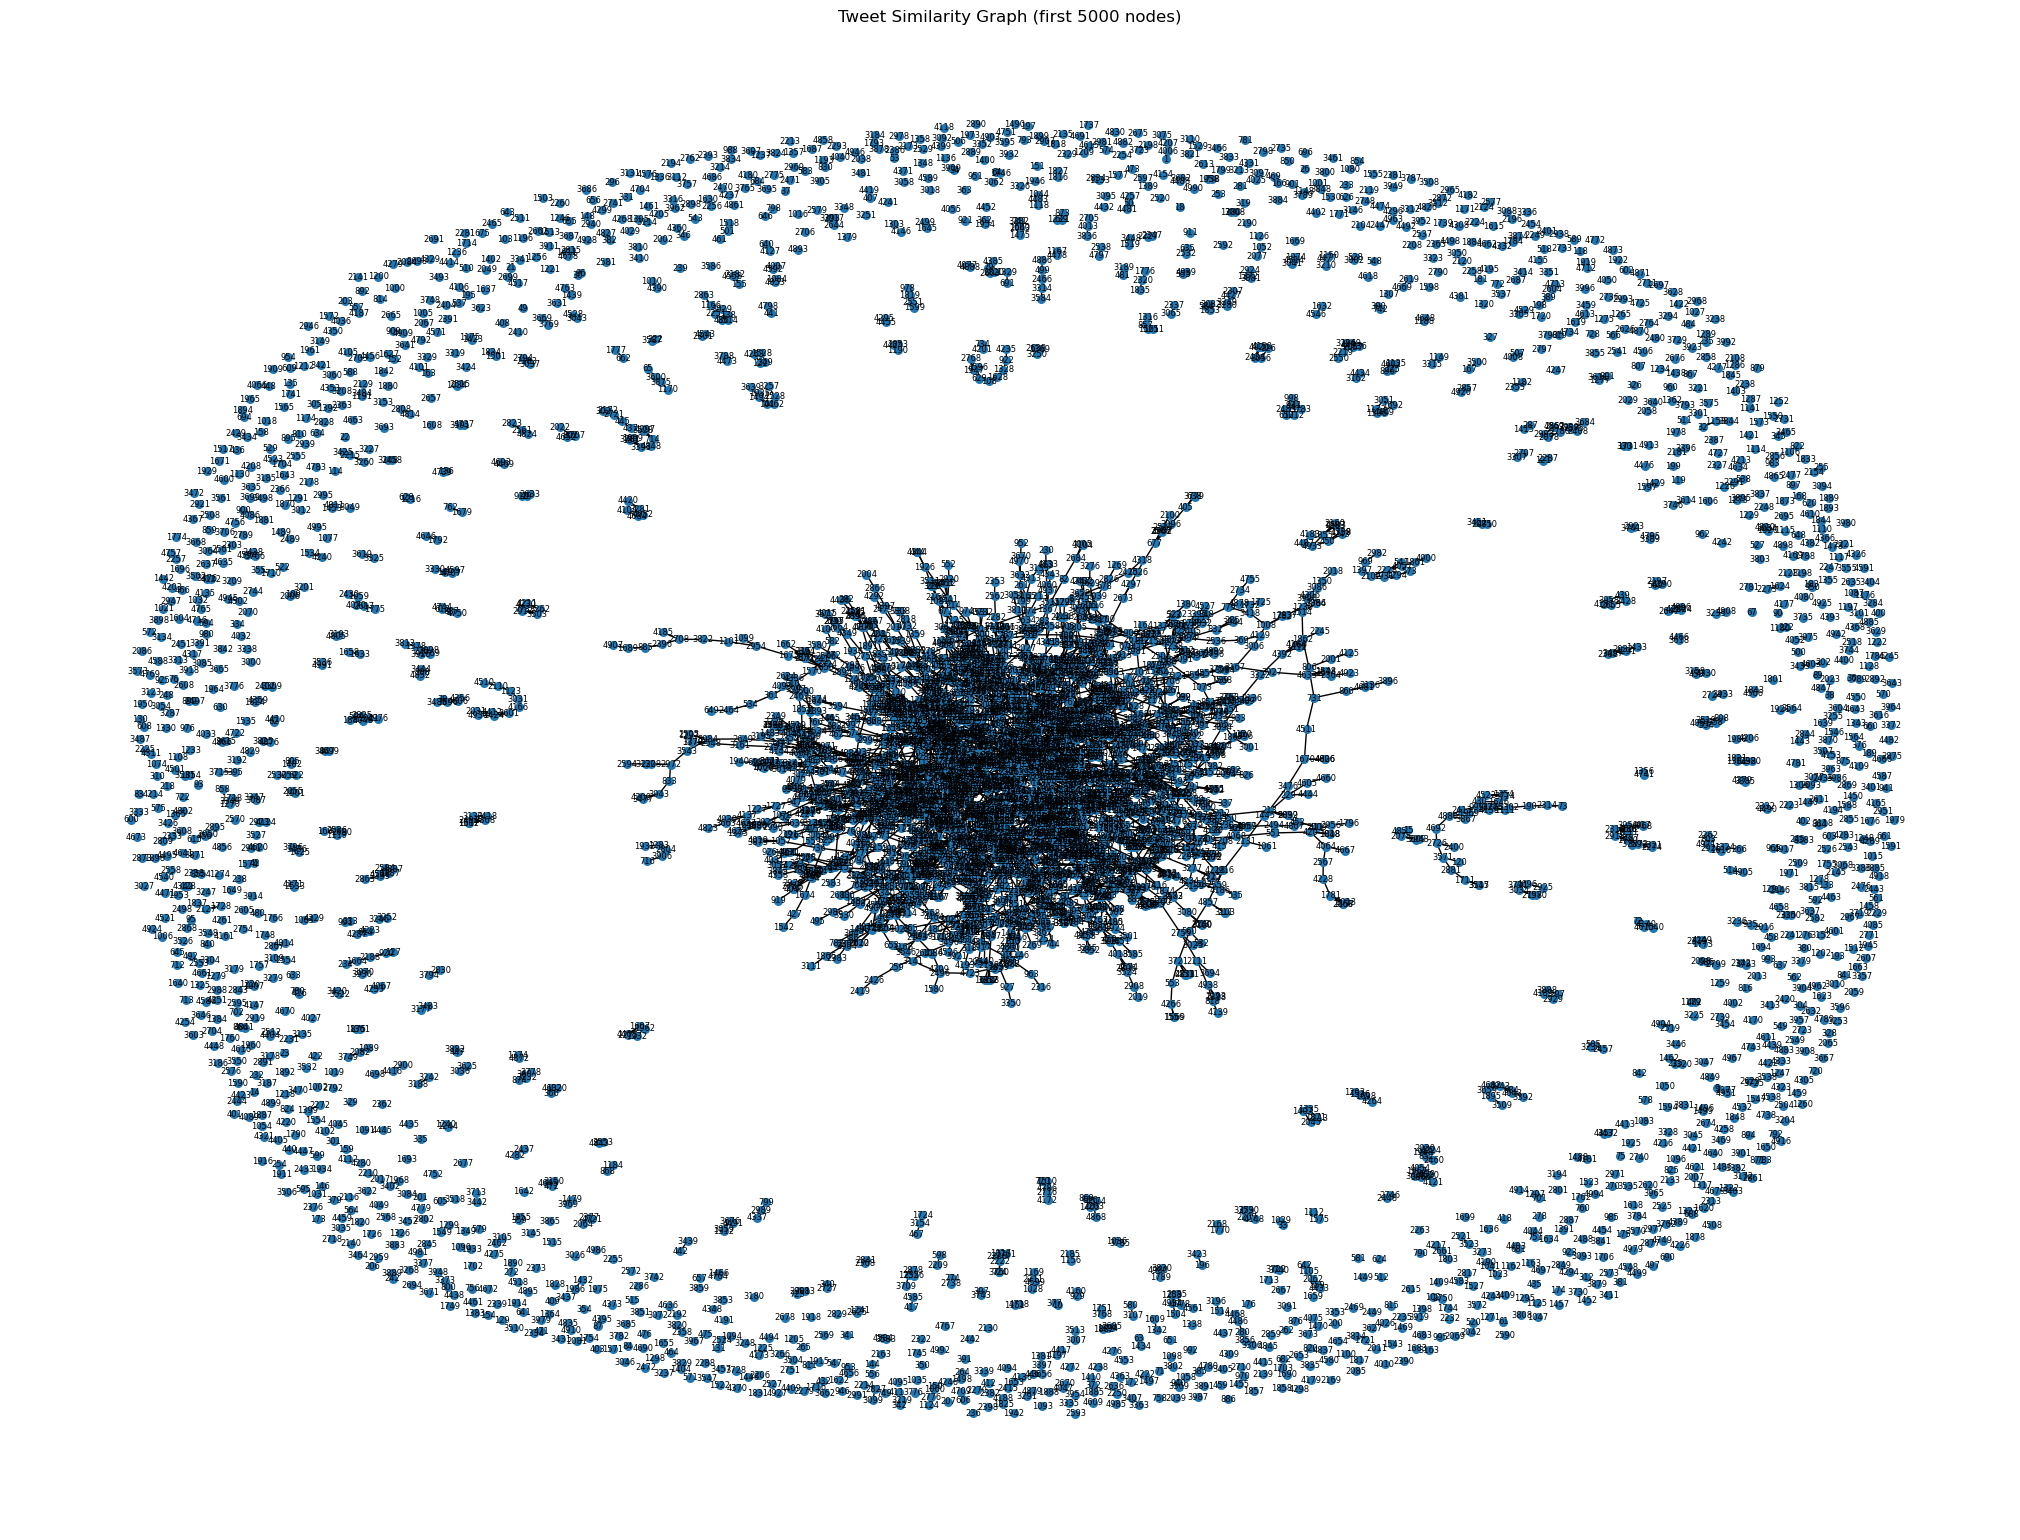

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(edges)

# Optional: limit to a subgraph for readability
subgraph_nodes = list(range(5000))  # first 5000 tweets
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(20, 15))  # Increase figure size for better detail
nx.draw(H, with_labels=True, node_size=30, font_size=6)
plt.title("Tweet Similarity Graph (first 5000 nodes)")

# Save the figure before showing it
plt.savefig("tweet_similarity_graph.png", dpi=300, bbox_inches='tight')  # High resolution
plt.show()

In [34]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [36]:
from pyvis.network import Network

net = Network(height='1000px', width='100%', notebook=True)

# Add nodes
for i, tweet in enumerate(tweet_texts[:10000]):
    net.add_node(int(i), label=tweet[:50], title=tweet)

# Add edges (ensure int conversion)
for src, tgt in edges:
    if src < 10000 and tgt < 10000:
        net.add_edge(int(src), int(tgt))

net.show("tweet_similarity.html")

tweet_similarity.html


In [6]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

df['Cluster'] = labels
df[['Tweet', 'Cluster']].head()

Tweet  Cluster
0  Station activity person against natural majori...        9
1  Authority research natural life material staff...        8
2  Manage whose quickly especially foot none to g...        0
3  Just cover eight opportunity strong policy which.        1
4                      Animal sign six data good or.        0

/tmp/ipykernel_54445/4102208355.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(np.unique(cluster_colors)))


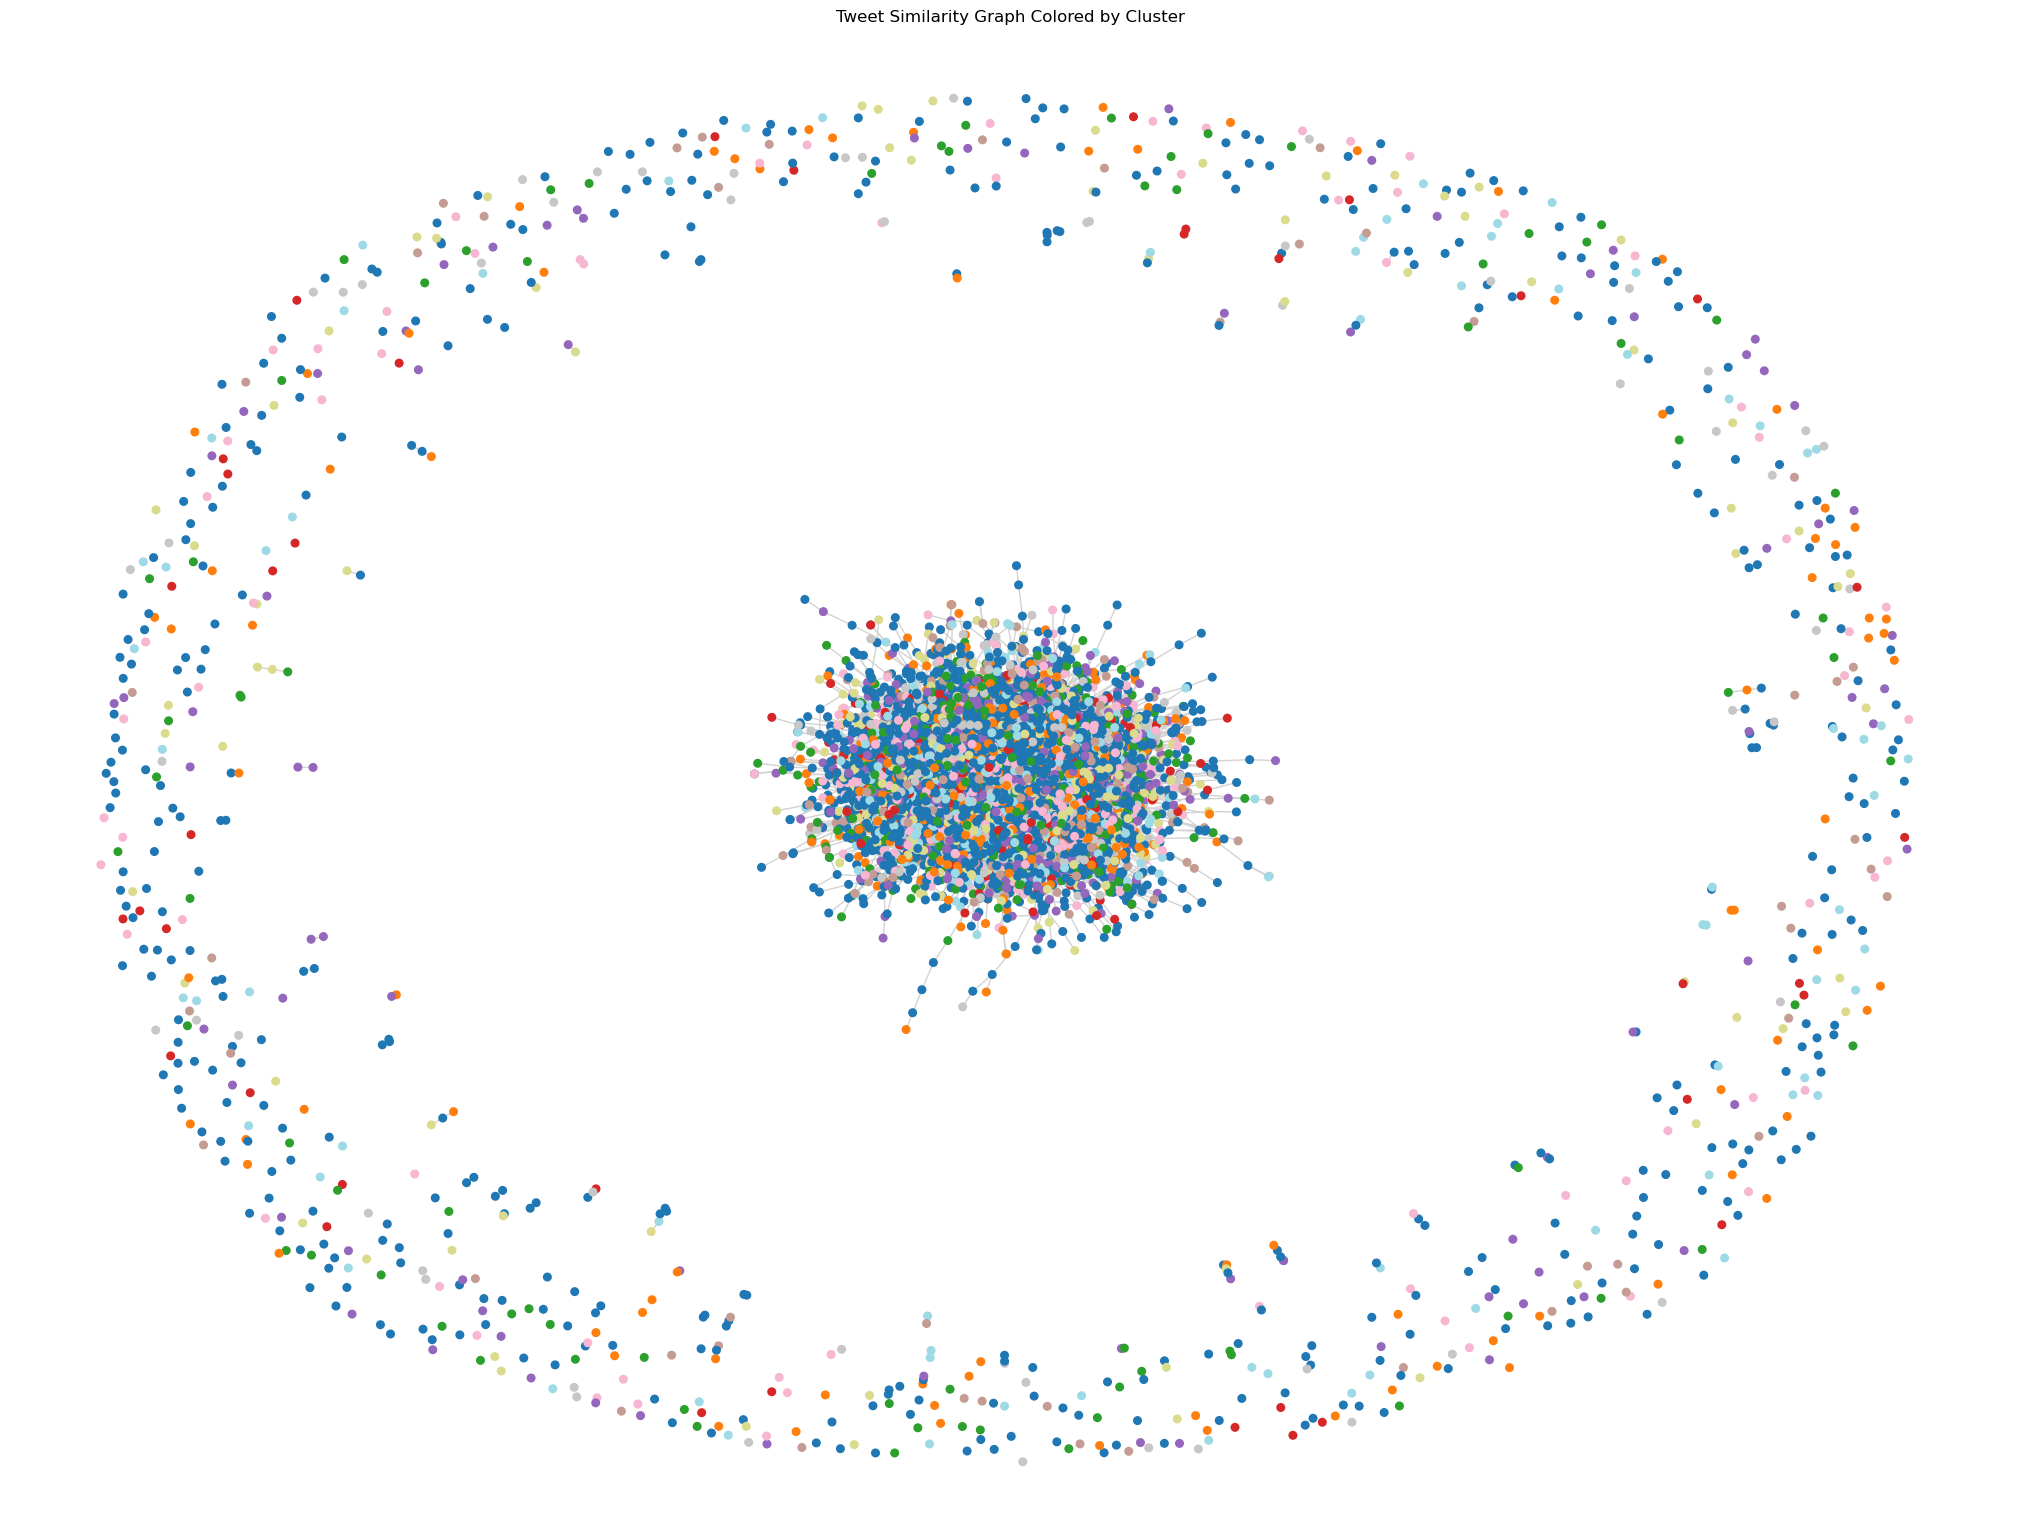

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Build graph from edges
G = nx.Graph()
G.add_edges_from(edges)

# Optional: limit to a subgraph (e.g., 2000 tweets)
subgraph_nodes = list(range(10000))
H = G.subgraph(subgraph_nodes)

# Get cluster labels for subgraph nodes
cluster_colors = df.loc[subgraph_nodes, "Cluster"].values

# Normalize to colormap
import numpy as np
cmap = plt.cm.get_cmap("tab20", len(np.unique(cluster_colors)))

# Assign color to each node
node_colors = [cmap(label) for label in cluster_colors]

# Plot
plt.figure(figsize=(20, 15))
nx.draw(H, 
        with_labels=False, 
        node_size=30, 
        node_color=node_colors,
        edge_color="lightgray")
plt.title("Tweet Similarity Graph Colored by Cluster")
plt.savefig("clustered_tweet_graph.png", dpi=500, bbox_inches='tight')
plt.show()

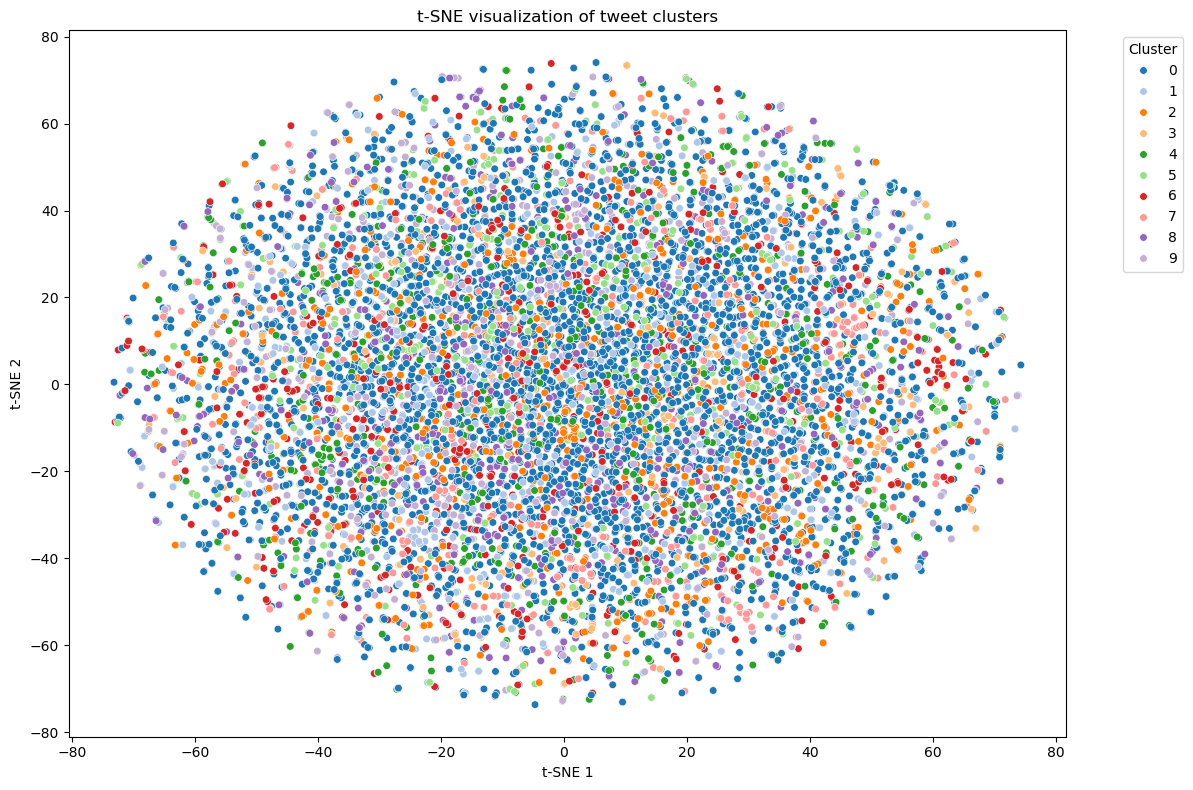

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Assume X = embeddings (e.g., from TF-IDF, BERT, etc.)
# 2. df["cluster"] must already be populated

# Optional: reduce dataset size for speed
n_samples = 10000
X_subset = X[:n_samples]
clusters = df["Cluster"].values[:n_samples]

# 3. Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X_subset)

# 4. Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=clusters, palette="tab20", s=30, legend="full")
plt.title("t-SNE visualization of tweet clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("tsne_clusters.png", dpi=500)
plt.show()

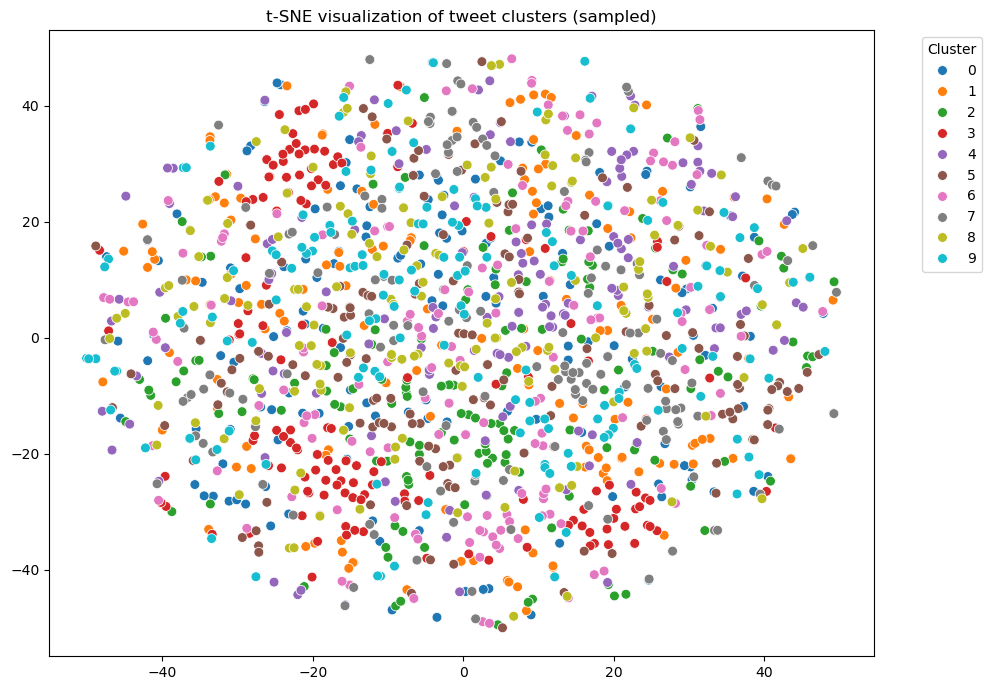

In [13]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='tab10', s=50)
plt.title("t-SNE visualization of tweet clusters (sampled)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.utils import resample

sampled_df = (
    df.groupby("Cluster", group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 150), random_state=42))
)

X_sampled = X[sampled_df.index]
clusters = sampled_df["Cluster"]

In [14]:
!pip install umap-learn

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


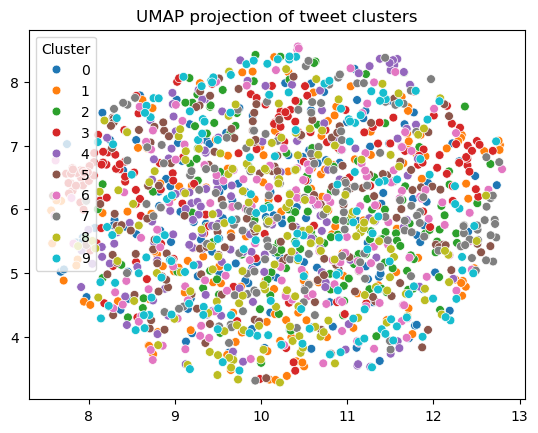

In [15]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_sampled)

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette="tab10", s=40)
plt.title("UMAP projection of tweet clusters")
plt.show()

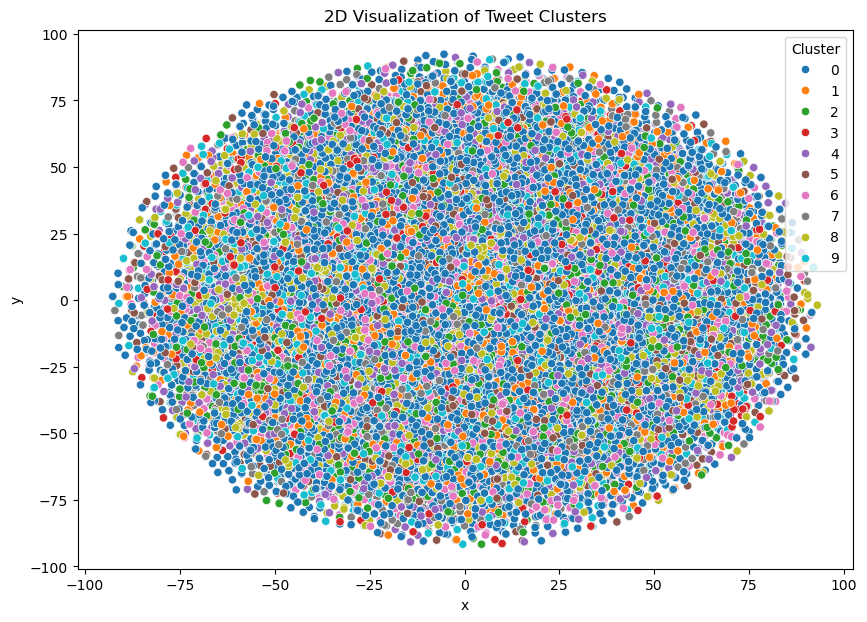

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

df['x'] = X_2d[:, 0]
df['y'] = X_2d[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='x', y='y', hue='Cluster', palette='tab10', legend='full')
plt.title("2D Visualization of Tweet Clusters")
plt.show()

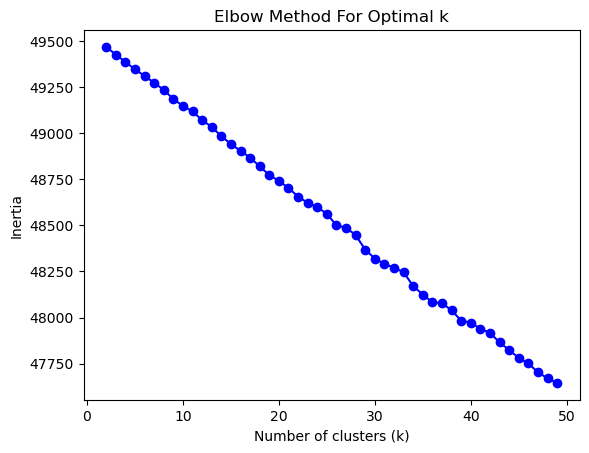

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # or your full vectorized tweet data
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sampled)
    score = silhouette_score(X_sampled, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.0011
k=3, Silhouette Score=0.0019
k=4, Silhouette Score=0.0009
k=5, Silhouette Score=0.0010
k=6, Silhouette Score=0.0013
k=7, Silhouette Score=0.0033
k=8, Silhouette Score=0.0029
k=9, Silhouette Score=0.0033
k=10, Silhouette Score=0.0033
k=11, Silhouette Score=0.0034
k=12, Silhouette Score=0.0037
k=13, Silhouette Score=0.0042
k=14, Silhouette Score=0.0046
k=15, Silhouette Score=0.0047
k=16, Silhouette Score=0.0060
k=17, Silhouette Score=0.0057
k=18, Silhouette Score=0.0064
k=19, Silhouette Score=0.0061
k=20, Silhouette Score=0.0064
